In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import offsetbox

In [2]:
from sklearn.datasets import fetch_olivetti_faces

faces = fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\TOHEEB\scikit_learn_data


In [4]:
print(faces.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   ===========

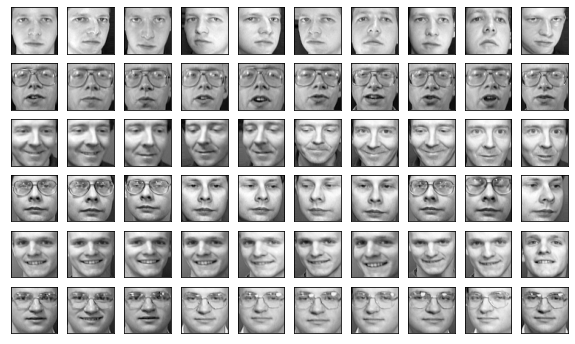

In [6]:
fig, ax = plt.subplots(6, 10, figsize = (10, 6), subplot_kw = dict(xticks =[], yticks = []))

for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap = 'gray')

In [7]:
x = faces.data

y = faces.target

In [8]:
x.shape, y.shape

((400, 4096), (400,))

In [10]:
from sklearn.decomposition import PCA

pca = PCA(100).fit(x)

Text(0, 0.5, 'cummulative variance')

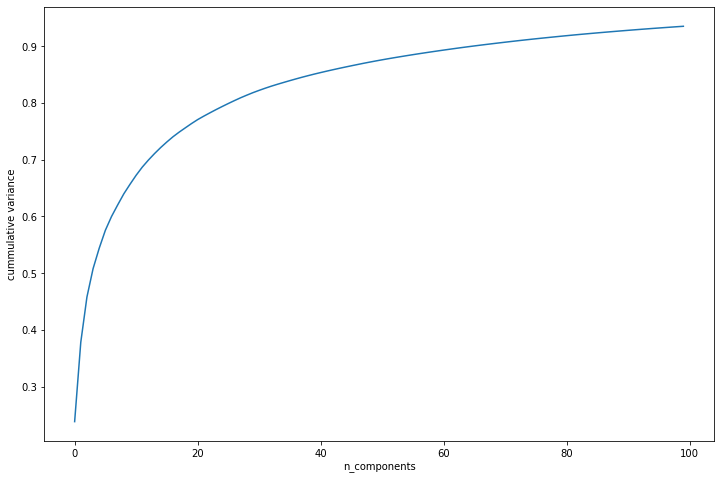

In [12]:
plt.figure(figsize = (12, 8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))

plt.xlabel('n_components')
plt.ylabel('cummulative variance')

In [25]:
def plot_components(data, x_new, images = None, axes = None, thumb_frac = 0.05, cmap = 'gray'):
    
    ax = ax or plt.gca()
    ax.plot(x_new[:, 0], x_new[:, 1], '.k')
    
    if images is not None:
        min_dist = (thumb_frac * max(x_new.max(0) - x_new.min(0) )) ** 2
        shown_images = np.array( [2 * x_new.max(0)])
        
        for i in range(data.shape[0]):
            
            dist = np.sum(x_new[i] - shown_images)
            
            if np.min(dist) < min_dist:
                continue
                
                shown_images = np.vstack([shown_images, x_new[i]])
                imagebox = offsetbox.AnnotationBbox(offsetbox.offsetImage(images[i], cmap = cmap), x_new[i])
                
                ax.add_artist(imagebox)

In [26]:
def apply_manifold_learning(x, method, show_scatter_plot = False):
    
    x_new = method.fit_transform(x)
    
    print('New shape of x: ', x_new.shape)
    print()
    print('Sample X')
    print()
    print(pd.DataFrame(x_new).sample(10))
    print()
    
    if show_scatter_plot is not False:
        
        fig, ax = plt.subplots(figsize = (12, 8))
        ax.scatter(x_new[:, 0], x_new[:, 1], cmap= 'Spectral')
        plt.xlabel('x[0] after transformation')
        plt.xlabel('x[1] after transformation')
        
    fig, ax = plt.subplots(figsize = (12, 8))
    plot_components(x[:20, :], x_new[:20, :], images = faces.images[:, ::2, ::2])
    plt.xlabel('component 1')
    plt.ylabel('component 2')
    
    return method

New shape of x:  (400, 2)

Sample X

            0          1
294  5.302656  -3.216782
92  -2.928785 -11.197862
284  8.221192   3.618554
356  6.209189   8.344223
143 -3.607195  -0.282830
29  -3.142554   1.868703
268 -5.689360  -6.998534
286  6.209936   0.777567
145 -5.105557  -0.309130
110 -2.725392   7.102744



UnboundLocalError: local variable 'ax' referenced before assignment

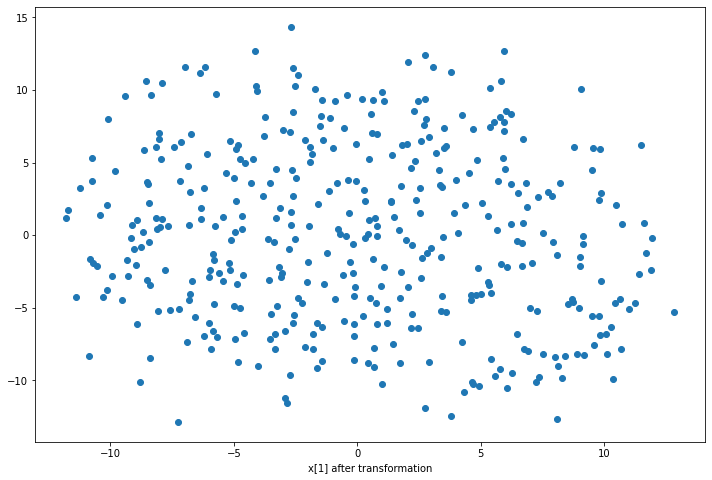

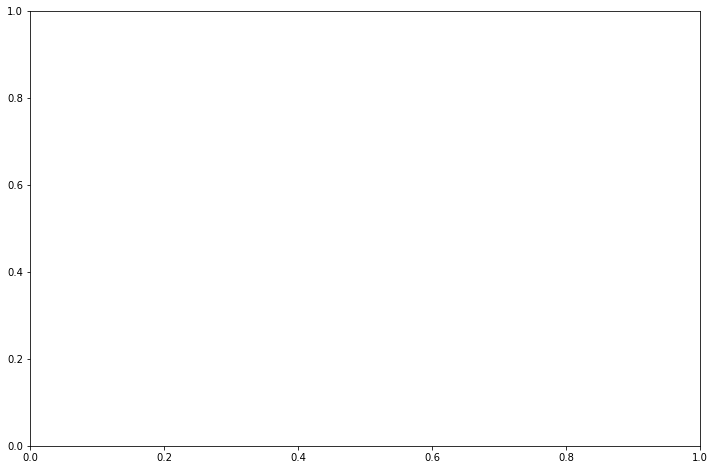

In [27]:
from sklearn.manifold import MDS

mds = apply_manifold_learning(x, MDS(n_components = 2,
                                        metric = True,
                                        n_init =  1, max_iter = 100,
                                       ), show_scatter_plot = True
                             )